In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [8]:
#importing Data
df = pd.read_csv('medical_examination.csv')

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Adding an 'overweight' column:  
    # 1:To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters.
    # 2: If that value is > 25 then the person is overweight.
    # 3: Use the value 0 for NOT overweight and the value 1 for overweight.        

In [10]:
#step 1: Calculating the BMI
BMI = (df['weight']) / (df['height'] /100)**2
# Step 2 & 3 checking whether overweight or not
overweight = []
for i in BMI:
    if i>25:
        overweight.append(1)
    elif i<=25:
        overweight.append(0)
# Adding the overwieght column
df['overweight'] = overweight  

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


# Normalize data by making 0 always good and 1 always bad.
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

In [5]:
# First solution: using a lambda conditioning 
df['cholesterol'] =  df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] =  df['gluc'].apply(lambda x: 0 if x == 1 else 1)
# same result as the subsequent cell acheieved. 

In [11]:
#second solution: creating a dictionary with the key value conditioning. i.e. 
    # if key is 1 make the value 0 example 1:0 & if key is more than 1 make the value 1 example 2:1, 3:1

Normalize_dict = {1:0, 2:1, 3:1}

df['cholesterol'] = df['cholesterol'].map(Normalize_dict)
df['gluc'] = df['gluc'].map(Normalize_dict)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot().
The dataset should be split by 'Cardio' so there is one chart for each cardio value.

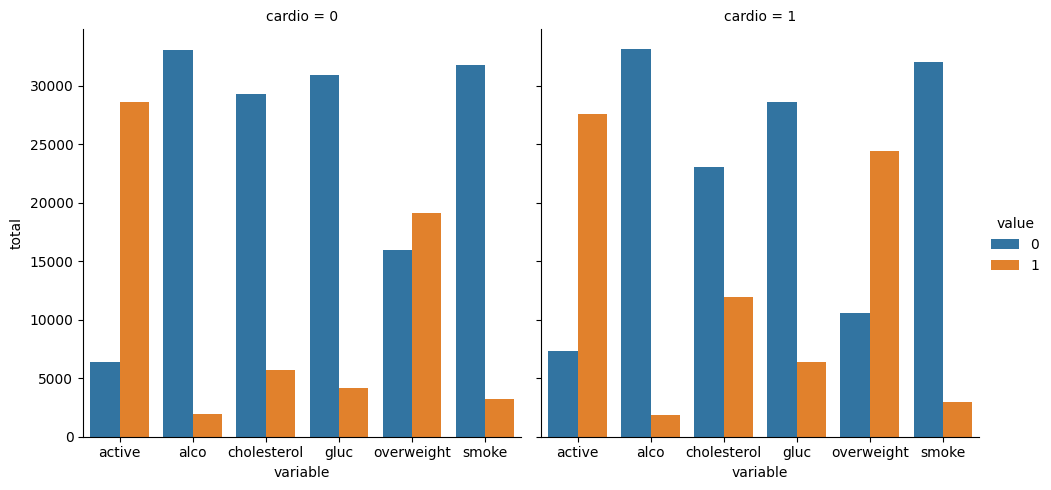

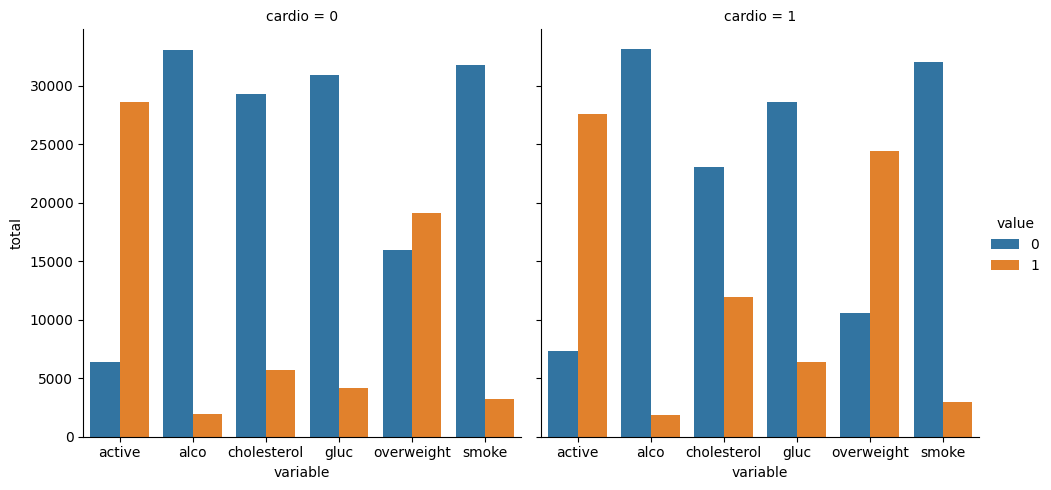

In [12]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol',
    #'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(
        frame=df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
        id_vars=['cardio']
    )
     # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
        #You will have to rename one of the columns for the catplot to work correctly.
    df_cat  = pd.DataFrame(
        df_cat.groupby(
                ['variable', 'value', 'cardio'])['value'].count()).rename(
                columns={'value': 'total'}).reset_index()
    
    # Set up the matplotlib figure and draw the catplot
    plt_fg = sns.catplot(x='variable', y='total', data=df_cat, hue='value', col='cardio', kind='bar')
    
     # Get the figure for the output
    fig = plt_fg.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()


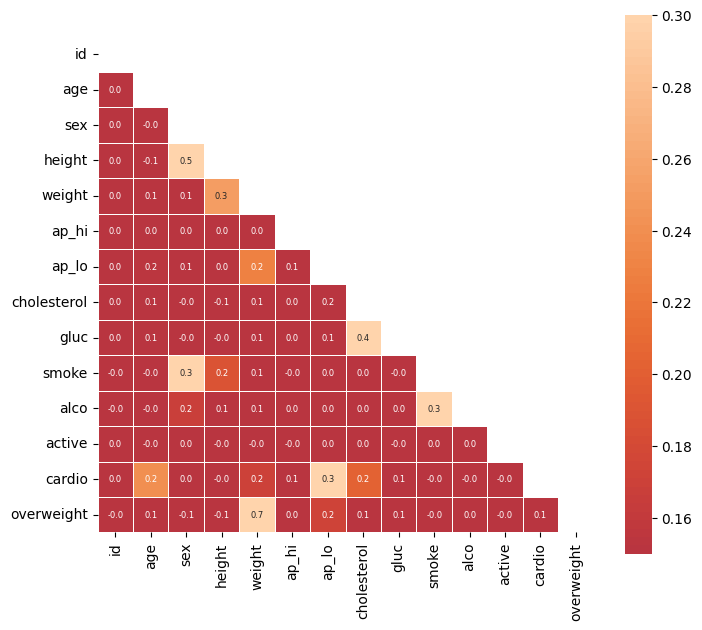

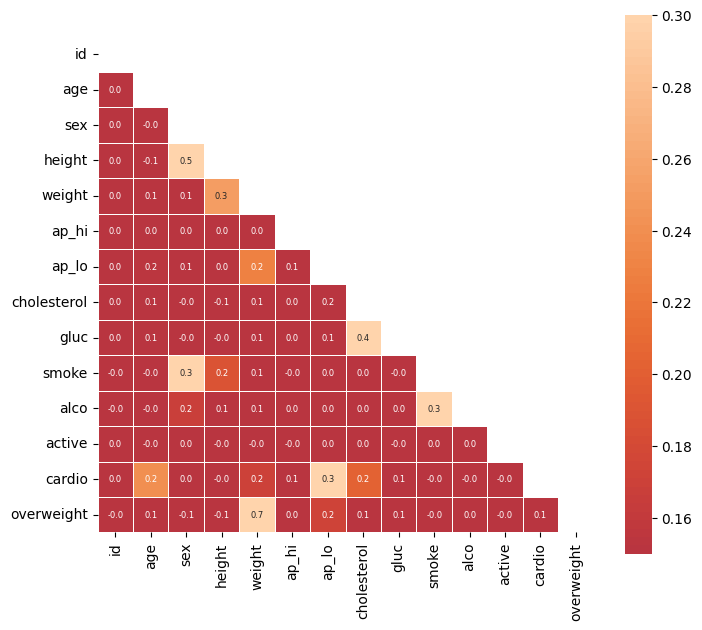

In [15]:
# Drawing Heat map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df_heat.corr(), dtype=bool))



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(8,10))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap( data = corr,
                annot = True,
                fmt = '.1f',
                vmax = .30,
                vmin = .15,
                mask = mask,
                center = 0,
                linewidths = .5,
                square = True,
                annot_kws={'fontsize':6}, 
                cbar_kws={"shrink": .7})
                
    fig.savefig('heatmap.png')
    return fig
draw_heat_map()